In [71]:
from hlsf.models import *
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import MoffatModel
%matplotlib inline

In [72]:
config = 'H'
lamp = 'Kr'
nb_line = 177
lamps = ['Ar', 'Kr', 'Ne', 'Xe']

In [73]:
lsf_data = LSF_DATA(f"../exposures/ARC-{lamp}_CLEAR_20MAS_{config}_PRM.fits", f"../text/{lamp}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", 
                        f"../exposures/SLITLET_TABLE_20MAS_{config}.fits")
lsf_data.get_line_list().keys()

dict_keys([171, 172, 173, 174, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199])

In [74]:
data = lsf_data.get_data_line(nb_line)
waves = data['map_wave']
w_0 = data['waveline']
intensity = data['intensity']

In [75]:
mod = MoffatModel()
init_params = mod.guess(intensity, x=waves-w_0)
init_params

name,value,initial value,min,max,vary,expression
amplitude,0.69980170,None,-inf,inf,True,
center,-0.03297538,None,-inf,inf,True,
sigma,1.35021458,None,0.00000000,inf,True,
beta,1.00000000,None,-inf,inf,True,
fwhm,2.70042916,None,-inf,inf,False,"2*sigma*sqrt(2**(1.0/max(1e-3, beta))-1)"
height,0.69980170,None,-inf,inf,False,amplitude


In [76]:
out = mod.fit(intensity, init_params, x=waves-w_0)
out.init_fit

array([0.07868244, 0.07655643, 0.07450968, 0.07253852, 0.07063946,
       0.06880922, 0.13516653, 0.13062094, 0.12627931, 0.12213083,
       0.11816529, 0.11437309, 0.11074513, 0.10727287, 0.10394823,
       0.10076362, 0.09771187, 0.09478621, 0.09198028, 0.08928807,
       0.08670391, 0.08422247, 0.0818387 , 0.07954785, 0.07734543,
       0.07522719, 0.07318914, 0.07122749, 0.06933866, 0.26573408,
       0.25476699, 0.24433219, 0.23440723, 0.22496939, 0.21599598,
       0.20746461, 0.19935332, 0.19164078, 0.18430635, 0.17733019,
       0.17069326, 0.16437739, 0.15836524, 0.15264036, 0.14718712,
       0.14199074, 0.13703721, 0.13231333, 0.1278066 , 0.12350525,
       0.1193982 , 0.11547498, 0.11172575, 0.10814123, 0.10471269,
       0.10143192, 0.09829117, 0.09528317, 0.09240105, 0.08963835,
       0.086989  , 0.08444726, 0.08200774, 0.07966535, 0.0774153 ,
       0.07525306, 0.07317437, 0.0711752 , 0.06925176, 0.55432651,
       0.53460417, 0.51476939, 0.49499208, 0.47541776, 0.45616

In [77]:
out.params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,0.34619037,7.9684e-08,(0.00%),0.699801698423368,-inf,inf,True,
center,-0.02102233,3.0392e-07,(0.00%),-0.03297538393555534,-inf,inf,True,
sigma,286.371469,0.28409491,(0.10%),1.3502145777410988,0.00000000,inf,True,
beta,30877.8624,61.2621488,(0.20%),1.0,-inf,inf,True,
fwhm,2.71363416,7.1903e-07,(0.00%),2.7004291554821975,-inf,inf,False,"2*sigma*sqrt(2**(1.0/max(1e-3, beta))-1)"
height,0.34619037,7.9684e-08,(0.00%),0.699801698423368,-inf,inf,False,amplitude


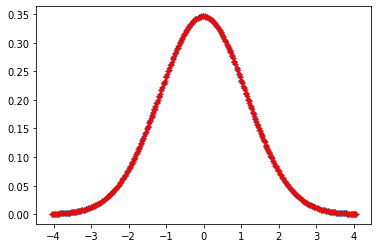

In [78]:
fig = plt.figure()
ax = plt.axes()
lsf_data.plot_line(nb_line, ax)
ax.plot(waves-w_0, out.best_fit, '.', color='red')
plt.show()